In [1]:
%matplotlib inline

import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.config import FIG_DIR, DATA_DIR

In [152]:
figure_data_file = os.path.join(FIG_DIR, 'fig_6_data.csv')
figure_name = os.path.join(FIG_DIR, 'paper_fig_6.png')

if not os.path.exists(figure_data_file):
    substitution_rating_file = os.path.join(DATA_DIR, 'UserStudy2', 'substitution_ratings.csv')
    df = pd.read_csv(substitution_rating_file)
    user_mean_rating = df.groupby('user')['rating'].mean()
    user_mean_rating.to_csv(figure_data_file, index=False)

# Histogram of rating

In [3]:
def plot_hist(data, figure_name, bins, width, height, xlabel, ylabel, xmax=None, ymax=None, legend_title=None, legend_labels=None, color='grey', palette=None, alpha=0.9, hue=None, multiple="dodge"):    
    plt.rc('pdf', fonttype=42)
    sns.set(style="ticks")
    sns.set_context('paper', font_scale=1.3)
    plt.subplots(figsize=(width, height))
    ax = sns.histplot(data, x='rating', bins=bins, kde=False, color=color, palette=palette, alpha=alpha, hue=hue, multiple=multiple, shrink=.7) 
    ax.set_xlim(xmin=1, xmax=xmax)
    ax.set_ylim(ymin=0, ymax=ymax)
    ax.grid(ls="dotted")
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    if legend_title and legend_labels:
        ax.legend(title=legend_title, labels=legend_labels, loc='upper left', bbox_to_anchor=(1.05, 1))
    sns.despine(offset=10, trim=True) 
#     plt.legend([],[], frameon=False)
    plt.tight_layout()
    plt.savefig(figure_name, dpi=200, transparent=False, bbox_inches='tight', pad_inches=0.0)
    plt.show()

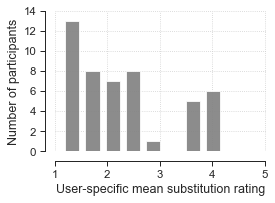

In [4]:
figure_data_file = os.path.join(FIG_DIR, 'fig_6_data.csv')
figure_name = os.path.join(FIG_DIR, 'paper_fig_6.png')
data = pd.read_csv(figure_data_file)
bin_width = 0.5
bins = [i_bin*bin_width for i_bin in range(int(5/bin_width))]
plot_hist(data, figure_name, bins=8, width=4, height=3, xlabel="User-specific mean substitution rating", ylabel="Number of participants", xmax=5.01, ymax=14)

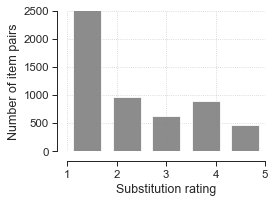

In [5]:
figure_data_file = os.path.join(FIG_DIR, 'us2_human_sim.csv')
figure_name = os.path.join(FIG_DIR, 'us2_human_sim_hist.png')
data = pd.read_csv(figure_data_file)
plot_hist(data, figure_name, bins=5, width=4, height=3, xlabel="Substitution rating", ylabel="Number of item pairs", xmax=5, ymax=2500)

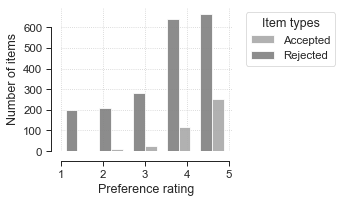

In [6]:
figure_data_file = os.path.join(FIG_DIR, 'us2_pref_ratings.tsv')
figure_name = os.path.join(FIG_DIR, 'us2_pref_ratings.png')
data = pd.read_csv(figure_data_file, sep="\t")
plot_hist(data, figure_name, width=5, bins=5, height=3, xlabel="Preference rating", ylabel="Number of items", 
          legend_title="Item types", legend_labels=["Accepted", "Rejected"], hue="is_gt", palette=dict(zip([0,1],["grey", "darkgrey"])))

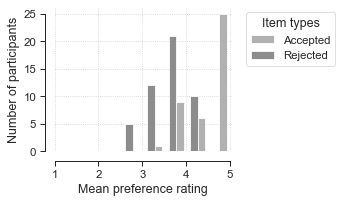

In [7]:
figure_data_file = os.path.join(FIG_DIR, 'us2_mean_pref_ratings.tsv')
figure_name = os.path.join(FIG_DIR, 'us2_mean_pref_ratings.png')
data = pd.read_csv(figure_data_file, sep="\t")
plot_hist(data, figure_name, width=5, bins=5, height=3, xlabel="Mean preference rating", ylabel="Number of participants", 
          legend_title="Item types", legend_labels=["Accepted", "Rejected"], hue="is_gt", palette=dict(zip([0,1],["grey", "darkgrey"])))